In [2]:
import pandas as pd
import seaborn as sns


In [3]:
data=pd.read_csv("/Users/richikghosh/Documents/Financial NLP/data.csv",encoding="utf-8")
data.Sentence[0]

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

<Axes: xlabel='Sentiment', ylabel='count'>

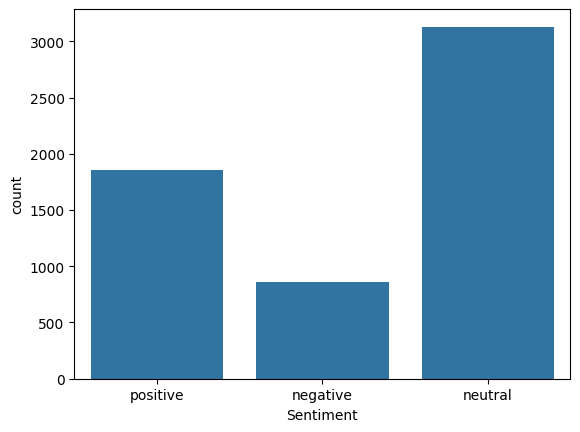

In [7]:
sns.countplot(x="Sentiment",data=data)

## Data Preprocessing


In [4]:
data["Sentiment_num"]=data.Sentiment.map({'negative':0,'neutral':1,'positive':2})

In [304]:
## Custom function to lower and remove punctuations

def remove_punctuations_lower(sentence):
        for i in sentence:
            if i in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~':
                sentence=sentence.replace(i,"")
        return sentence.lower()

In [41]:
## Here the punctuations are removed and the text is lowered and the it is split based on the spaces
data["Sentence_special"]=data.apply(lambda row: remove_punctuations_lower(row['Sentence']),axis=1)
data["Sentence_special"][0]

'the geosolutions technology will leverage benefon s gps solutions by providing location based search technology  a communities platform  location relevant multimedia content and a new and powerful commercial model '

Preprocessing to remove stop words and punctuations and bring the word to the base form and along with that lower the text

In [5]:
import spacy
from spacy.lang.en import stop_words
nlp = spacy.load('en_core_web_sm')
## This removes the stop words for not looking at the extra words
# def remove_stopwords_punctuations(sentence):
#     fin=[]
#     doc=nlp(str(sentence))
#     for token in doc: 
#         if token.is_punct or not token.is_stop:
#                 fin.append(token.lemma_.lower())
#     return fin 

def remove_stopwords_punctuations(sentence):
    doc=nlp(sentence)
    return ' '.join([token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.like_num and not token.is_space and not token.is_digit and not token.is_currency])

In [6]:
data['Sentence_special']=data.apply(lambda row:remove_stopwords_punctuations(row['Sentence']),axis=1)


In [133]:
data['Sentence_special']

0       geosolutions technology leverage benefon gps s...
1                             esi low bk real possibility
2       quarter componenta net sale double eur131 m eu...
3       accord finnish russian chamber commerce major ...
4       swedish buyout firm sell remain percent stake ...
                              ...                        
5837    rise cost force packaging producer huhtamaki a...
5838    nordic walking summer training method cross co...
5839    accord shipping company viking line eu decisio...
5840    building home improvement trade sale decrease ...
5841    helsinki afx kci konecranes say win order hot ...
Name: Sentence_special, Length: 5838, dtype: object

## Using Afinn for sentiment analysis

In [59]:
from afinn import Afinn

# Create an Afinn object
afinn = Afinn()

def afinn_fit(text):
# Get the sentiment score for the text
    text=str(text)
    sentiment_score = afinn.score(text)
    return sentiment_score


In [60]:
data['Afinn_score']=data.apply(lambda row: afinn_fit(row["Sentence_special"]),axis=1)

<Axes: xlabel='Afinn_score', ylabel='Count'>

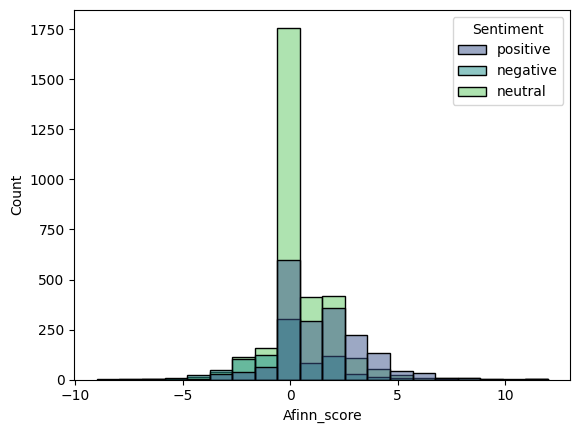

In [61]:
sns.histplot(x='Afinn_score', hue='Sentiment', data=data, bins=20, multiple="layer", palette='viridis', edgecolor='black')

In [62]:
data['Emotion'] = pd.cut(data['Afinn_score'], bins=[-float('inf'), -1, 1, float('inf')],labels=['negative', 'neutral', 'positive'], include_lowest=True)


Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [63]:

data[data['Emotion']==data['Sentiment']]

,Sentence,Sentiment,Sentiment_num,Sentence_special,Vector_data,Afinn_score,Emotion
0,The GeoSolutions technology will leverage Bene...,positive,1,"[geosolutions, technology, leverage, benefon, ...","[0.5300722, 0.024044076, 5.761439, -1.2413927,...",3.0,positive
3,According to the Finnish-Russian Chamber of Co...,neutral,0,"[accord, finnish, russian, chamber, commerce, ...","[0.46153453, -0.38651565, 5.8155856, -1.139184...",0.0,neutral
4,The Swedish buyout firm has sold its remaining...,neutral,0,"[swedish, buyout, firm, sell, remain, percent,...","[0.38809285, -0.48005748, 5.2988067, -1.182184...",0.0,neutral
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,-1,"[shell, bg, deal, meet, shareholder, skepticism]","[0.49071455, -0.70048046, 4.527717, -1.2350926...",-2.0,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,-1,"[ssh, communications, security, corp, stock, e...","[0.4708848, -0.736402, 5.8216434, -1.2963929, ...",-3.0,negative
...,...,...,...,...,...,...,...
5834,Investments in product development stood at 6....,neutral,0,"[investment, product, development, stand, mln,...","[0.39153373, -0.50246537, 5.031493, -1.3009655...",0.0,neutral
5836,Daily Mail parent company in talks with potent...,positive,1,"[daily, mail, parent, company, talk, potential...","[0.7857352, -0.3452473, 4.92867, -1.1693097, 7...",2.0,positive
5838,Nordic Walking was first used as a summer trai...,neutral,0,"[nordic, walking, summer, training, method, cr...","[0.9432461, 0.15256935, 6.1478224, -1.5707937,...",0.0,neutral
5839,"According shipping company Viking Line , the E...",neutral,0,"[accord, shipping, company, viking, line, eu, ...","[0.6227991, -0.40400213, 5.644293, -1.2204665,...",1.0,neutral


# From here I will use TF_IDF and ML algos to find the sentiment

In [49]:
data["Sentence_special"]=data.apply(lambda row:str(row["Sentence_special"]),axis=1)

0       ['geosolutions', 'technology', 'leverage', 'be...
1             ['esi', 'low', 'bk', 'real', 'possibility']
2       ['quarter', 'componenta', 'net', 'sale', 'doub...
3       ['accord', 'finnish', 'russian', 'chamber', 'c...
4       ['swedish', 'buyout', 'firm', 'sell', 'remain'...
                              ...                        
5837    ['rise', 'cost', 'force', 'packaging', 'produc...
5838    ['nordic', 'walking', 'summer', 'training', 'm...
5839    ['accord', 'shipping', 'company', 'viking', 'l...
5840    ['building', 'home', 'improvement', 'trade', '...
5841    ['helsinki', 'afx', 'kci', 'konecranes', 'say'...
Name: Sentence_special, Length: 5842, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(data.Sentence,data.Sentiment_num,test_size=0.1,stratify=data.Sentiment_num)

In [21]:
print(f"The shape of the train set:{X_train.shape}")
print(f"The shape of the test set:{X_test.shape}")

The shape of the train set:(5257,)
The shape of the test set:(585,)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf_pipeline=Pipeline([('vetor_tf_idf',TfidfVectorizer()),
               ('KNN',KNeighborsClassifier(n_neighbors=7))])
clf_pipeline.fit(X_train,y_train)
y_pred=clf_pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.37      0.15      0.21        86
           0       0.59      0.93      0.72       313
           1       0.81      0.23      0.35       186

    accuracy                           0.59       585
   macro avg       0.59      0.44      0.43       585
weighted avg       0.63      0.59      0.53       585



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

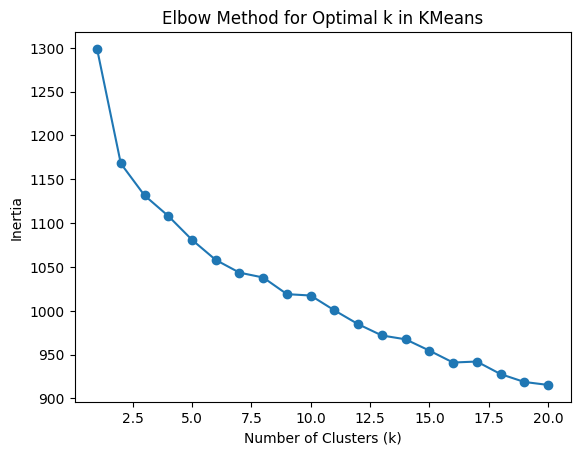

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Assuming 'X_train' contains your text data

# Create a pipeline with TF-IDF vectorization and TruncatedSVD (for dimensionality reduction)
pipeline = make_pipeline(TfidfVectorizer(), TruncatedSVD(n_components=100))

# Fit and transform the text data
X_train_tfidf_svd = pipeline.fit_transform(X_train)

# Initialize a list to store the inertia values
inertia_values = []

# Define a range of k values to try
k_values = range(1, 21)

# Iterate over each k value and compute inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_tfidf_svd)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k in KMeans')
plt.show()


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Assuming 'X_train' and 'y_train' contain your training data
# and 'X_test' contains your test data

# Create a pipeline with TF-IDF vectorization and GradientBoostingClassifier
clf_pipeline = Pipeline([
    ('vector_tf_idf', TfidfVectorizer()),
    ('GB', GradientBoostingClassifier(n_estimators=100, random_state=42))  # You can adjust hyperparameters
])

# Fit the pipeline on the training data
clf_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf_pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.44      0.16      0.24        86
           0       0.68      0.94      0.79       313
           1       0.85      0.55      0.67       186

    accuracy                           0.70       585
   macro avg       0.65      0.55      0.56       585
weighted avg       0.70      0.70      0.67       585



In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Assuming 'X_train' and 'y_train' contain your training data
# and 'X_test' contains your test data

# Create base models
base_models = [
    ('MultinomialNB', MultinomialNB()),
    ('GB', GradientBoostingClassifier(n_estimators=100, random_state=42))  # You can adjust hyperparameters
]

# Create a stacking classifier with a Gradient Boosting meta-model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=GradientBoostingClassifier(n_estimators=50, random_state=42))

# Create a pipeline with TF-IDF vectorization and the stacking classifier
clf_pipeline = Pipeline([
    ('vector_tf_idf', TfidfVectorizer()),
    ('stacking_classifier', stacking_clf)
])

# Fit the pipeline on the training data
clf_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf_pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming 'X_train' and 'y_train' contain your training data
# and 'X_test' contains your test data

# Create a pipeline with TF-IDF vectorization and RandomForestClassifier
clf_pipeline = Pipeline([
    ('vector_tf_idf', TfidfVectorizer()),
    ('RandomForest', RandomForestClassifier())  # Hyperparameters will be tuned
])

# Define the hyperparameter grid to search
param_grid = {
    'RandomForest__n_estimators': [50, 100, 150],
    'RandomForest__max_depth': [None, 10, 20],
    'RandomForest__min_samples_split': [2, 5, 10],
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(clf_pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.13      0.09      0.11        86
           0       0.64      0.81      0.71       313
           1       0.81      0.55      0.66       186

    accuracy                           0.62       585
   macro avg       0.53      0.49      0.49       585
weighted avg       0.62      0.62      0.61       585



In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Assuming 'X_train' and 'y_train' contain your training data
# and 'X_test' contains your test data

# Create base models with manually set hyperparameters
base_models = [
    ('MultinomialNB', MultinomialNB(alpha=1.0)),  # You can adjust alpha as needed
    ('RandomForest', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)),  # You can adjust hyperparameters
]

# Create a stacking classifier with a Gradient Boosting meta-model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=GradientBoostingClassifier(n_estimators=50, random_state=42))

# Create a pipeline with TF-IDF vectorization and the stacking classifier
clf_pipeline = Pipeline([
    ('vector_tf_idf', TfidfVectorizer()),
    ('stacking_classifier', stacking_clf)
])

# Fit the pipeline on the training data
clf_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf_pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.52      0.16      0.25        86
           0       0.73      0.89      0.81       313
           1       0.76      0.72      0.74       186

    accuracy                           0.73       585
   macro avg       0.67      0.59      0.60       585
weighted avg       0.71      0.73      0.70       585



## Word2Vec using gensim to train in on the corpus present


In [1]:
import gensim


In [73]:
model=gensim.models.FastText(
    window=2, #This takes the first 10 and last 10 words of the target word
    min_count=1, # Minimum words should be 2 in a sentence to be considered in our model
    workers=6, #CPU threads to use
    sg=1, # to choose the skip gram model
    min_n=4,
    max_n=7,
    vector_size=300
)

In [75]:
model.build_vocab(data.Sentence_special,progress_per=10)

In [76]:
model.train(data.Sentence_special, total_examples=model.corpus_count, epochs=10)

(580450, 640240)

In [78]:
model.save("final.model")

(300,)

In [79]:
model.wv.most_similar("rise",topn=10)

[('riser', 0.9941862225532532),
 ('fall', 0.992938220500946),
 ('x20ac', 0.9857463836669922),
 ('jump', 0.9854316711425781),
 ('q2', 0.9848173260688782),
 ('turnover', 0.9839875102043152),
 ('margin', 0.9834147691726685),
 ('quarter', 0.9826531410217285),
 ('slightly', 0.9824850559234619),
 ('liter', 0.9812695384025574)]

In [80]:
model.wv.similarity(w1='negative',w2='positive')

0.979464

# Train using SpaCy
SpaCy is going to be trained on English corpus as the default behavior

In [14]:
import spacy
import numpy as np
#spacy.cli.download("en_core_web_lg")
nlp=spacy.load('en_core_web_lg')
def remove_stopwords_punctuations_vec_form(sentence):
    doc=nlp((sentence))
    words = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.like_num and not token.is_space and not token.is_digit and not token.is_currency and len(token.text)>2]
    string_form=" ".join(words)
    # if words:
    #     return model.wv.get_mean_vector(words)
    # else:
    #     return None
    #vector=[]
    # print(string_form)
    string_form=nlp(string_form)
    vector_form=[token.vector for token in string_form]
    # print(vector_form,len(vector_form),vector_form[0].shape)
    vector_form_mean=np.mean(vector_form,axis=0)
    if vector_form_mean.any():
         return vector_form_mean
    else:
         return np.zeros(300) 
    # print("------------")
    # print(vector_form_mean,len(vector_form_mean))


In [15]:
data['Vector_data']=data.apply(lambda row:remove_stopwords_punctuations_vec_form(row["Sentence"]),axis=1)
#data["Sentence"].isna().sum()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [19]:
data=data.dropna()
data["Vector_data"][data["Vector_data"].isna()]

Series([], Name: Vector_data, dtype: object)

In [20]:
#data=data.dropna()
for i in data["Vector_data"]:
    if i.shape[0]!=300:
        print("Yes some is diff")

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    data.Vector_data.values,
    data.Sentiment_num,
    test_size=0.2
)
X_train

array([array([-1.16492212e+00,  1.28016591e+00, -8.01001132e-01,  6.44645751e-01,
               1.69295001e+00,  1.78887397e-01,  7.18298912e-01,  2.46992588e+00,
              -2.65513301e+00, -1.12628686e+00,  2.98495603e+00,  5.89341760e-01,
              -2.65222430e+00,  9.34726298e-01, -1.19517243e+00,  1.05475748e+00,
               5.68694890e-01,  6.27198994e-01, -7.02908456e-01,  2.35722169e-01,
              -6.59201503e-01,  1.63051414e+00, -3.75481069e-01,  1.18955386e+00,
               1.11101997e+00, -8.84074152e-01, -2.18316245e+00, -1.35006416e+00,
               8.35625976e-02,  5.33332050e-01,  3.86878729e-01, -4.08207804e-01,
              -7.45991707e-01, -5.98361015e-01,  6.86682880e-01, -4.60124254e-01,
               8.97790134e-01,  6.58218503e-01,  1.41156995e+00,  5.85402250e-01,
               1.04351866e+00, -4.09263343e-01,  1.07756054e+00,  2.03187251e+00,
              -1.69774950e+00,  6.07959390e-01,  1.25112045e+00, -2.10160899e+00,
               3

In [22]:
### Here we are transforming the vector of words from array of arrays to 2d array
import numpy as np
X_train_stack=np.stack(X_train)
X_test_stack=np.stack(X_test)


In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Create a pipeline with MinMaxScaler and KNeighborsClassifier
pipe = Pipeline([
    ('Scaler', MinMaxScaler()),
    ('KNN', KNeighborsClassifier(n_neighbors=10))
])

# Fit the pipeline on the training data 
pipe.fit(X_train_stack, y_train)


Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=10))])

In [203]:
from sklearn.metrics import classification_report
y_pred=pipe.predict(X_test_stack)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.28      0.56      0.37        86
           1       0.83      0.73      0.78       730
           2       0.59      0.59      0.59       352

    accuracy                           0.68      1168
   macro avg       0.57      0.63      0.58      1168
weighted avg       0.72      0.68      0.69      1168



In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
num_classes=3
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)



In [30]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train_stack is your input data
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_stack_normalized = scaler.fit_transform(X_train_stack)
X_test_stack_normalized = scaler.transform(X_test_stack)


In [24]:
X_train_stack.shape

(4670, 300)

In [293]:
# from keras.preprocessing.sequence import pad_sequences
# max_length=300
# X_train_stack = pad_sequences(X_train_stack, maxlen=max_length, padding='post')
# X_test_stack = pad_sequences(X_test_stack, maxlen=max_length, padding='post')


In [27]:
model = Sequential()
embedding_dim = nlp.vocab.vectors.shape[1]
model.add(Embedding(input_dim=nlp.vocab.vectors.shape[0], output_dim=embedding_dim,input_length=X_train_stack.shape[1], trainable=False))
model.add(LSTM(200))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          154247100 
                                                                 
 lstm (LSTM)                 (None, 200)               400800    
                                                                 
 dense (Dense)               (None, 3)                 603       
                                                                 
Total params: 154648503 (589.94 MB)
Trainable params: 401403 (1.53 MB)
Non-trainable params: 154247100 (588.41 MB)
_________________________________________________________________


In [31]:
model.fit(X_train_stack_normalized, y_train_one_hot, epochs=1, validation_split=0.1)

accuracy = model.evaluate(X_test_stack_normalized, y_test_one_hot)[1]
print("Test Accuracy:", accuracy)

37/37 [==============================] - 3s 83ms/step - loss: 0.9964 - accuracy: 0.5360
Test Accuracy: 0.5359588861465454


In [227]:
# Assuming X_train_stack is a 2D numpy array
unique_indices = np.unique(X_train_stack)

# Display unique indices and their range
print("Unique Indices:", unique_indices)
print("Min Index:", np.min(unique_indices))
print("Max Index:", np.max(unique_indices))

Unique Indices: [-10.22840023  -9.92940044  -9.87829971 ...  10.78299999  10.97900009
  12.42199993]
Min Index: -10.228400230407715
Max Index: 12.42199993133545


In [32]:
model.predict(X_test_stack_normalized[0])

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 300)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [282]:
sentence="The business increase after a long wait and that will make a lot of money"
sentence=remove_stopwords_punctuations_vec_form(sentence)

sentence=np.stack(sentence)
scaler.transform(sentence)

ValueError: Expected 2D array, got 1D array instead:
array=[-2.20651671e-01  7.68251657e-01 -4.48355007e+00  1.51849663e+00
 -5.80350220e-01 -2.52198309e-01  2.53909326e+00  4.90985012e+00
 -4.46299934e+00 -3.87144953e-01  3.86261654e+00  3.15886688e+00
 -9.41221714e-01  2.66079998e+00  6.82995701e-03  1.02058017e+00
  1.87671661e+00 -2.80472183e+00 -2.32445025e+00  3.86296660e-01
 -6.04408324e-01  3.80088329e+00 -1.06700170e+00 -1.89004171e+00
  1.36047995e+00 -1.19224763e+00 -2.89336181e+00 -7.61164799e-02
 -1.85637787e-01  4.26740360e+00  2.81060314e+00  1.22010075e-01
 -1.47924995e+00 -1.68528175e+00  2.52322507e+00 -2.81515002e+00
 -8.50225151e-01  3.00736332e+00  4.17516661e+00  2.81309319e+00
 -9.99423325e-01  2.02307487e+00  2.90583348e+00 -9.94173825e-01
 -3.24846673e+00  1.19116676e+00  1.74890196e+00 -4.17824888e+00
 -1.36339998e+00  2.24138331e+00  1.59436989e+00  1.52285182e+00
 -6.94108307e-01 -5.50610352e+00 -2.80738330e+00 -3.46793413e-01
  1.75916687e-01  3.31896663e+00  1.95135009e+00  5.05215049e-01
  4.50766712e-01  8.57157528e-01  2.44199932e-02 -3.79426003e+00
  1.37293828e+00  2.14118004e+00 -1.57490444e+00 -1.62302840e+00
  9.65691149e-01  7.16656923e-01 -8.72050151e-02 -1.39777327e+00
 -7.54566491e-02 -2.03383160e+00  5.58089852e-01  1.21475041e+00
 -1.77604663e+00  2.47883320e-01 -7.16500044e-01  1.98271886e-01
 -4.63433361e+00 -1.92759991e-01  2.81634998e+00  6.34160042e-01
  4.98083383e-01 -4.58366662e-01 -1.56881645e-01 -2.29231668e+00
  7.28149951e-01 -2.49111676e+00 -1.20484507e+00  2.55042839e+00
 -1.04621090e-01 -3.87351680e+00 -6.41491711e-01 -1.74248660e+00
  4.91212487e-01 -5.77681601e-01  1.79578209e+00  8.25376570e-01
  2.03699327e+00 -2.25468326e+00  6.51116669e-01  2.24912333e+00
  2.50805050e-01  4.90635824e+00 -3.77547836e+00 -2.24088335e+00
 -2.24960828e+00 -1.99444997e+00  9.14336205e-01 -6.86249733e-02
  3.01683187e-01 -2.16584992e+00  1.41022778e+00  4.96003342e+00
 -4.44466686e+00 -3.96528339e+00  1.80756843e+00 -9.64814961e-01
 -3.03530002e+00 -8.00016582e-01 -3.82043004e+00  2.17193341e+00
 -4.16766644e-01 -3.02522492e+00  1.98164999e+00 -5.26546061e-01
  8.91650140e-01  1.24639666e+00 -1.02717519e+00 -1.28924835e+00
  2.66608834e+00 -5.67466676e-01  1.33042669e+00  1.51889995e-01
  8.33332911e-02 -2.86266685e+00  3.17908359e+00  8.17869976e-02
 -2.19157076e+00 -1.97446501e+00  1.33328331e+00  1.79190004e+00
 -3.29704952e+00 -1.28575003e+00 -4.51591635e+00 -1.96214640e+00
 -1.24658501e+00  1.30256343e+00 -3.99333382e+00  2.57702327e+00
  7.89055049e-01  1.82431686e+00 -8.13843310e-01  1.28384992e-01
  2.48713326e+00  1.14983988e+00 -3.23916584e-01 -4.51801658e-01
 -2.44358316e-01 -1.44944179e+00  2.34078422e-01 -1.03799999e+00
 -2.29878497e+00 -5.69094956e-01 -1.82213676e+00 -1.23063004e+00
  1.70593560e+00  1.58351278e+00  1.16586888e+00  2.38143492e+00
 -6.18010044e-01  1.20351660e+00  5.35778284e-01  7.89323330e-01
 -1.12134337e+00 -1.43666565e-02  2.55797005e+00 -2.13485503e+00
 -1.71363401e+00  3.98605514e+00  3.06193328e+00  5.44822216e-03
 -2.55803347e+00  1.20050669e+00  7.82033145e-01 -3.15717316e+00
  1.66436672e+00  4.14079809e+00 -1.37436330e+00  1.32723331e+00
 -2.00660992e+00 -2.68428326e+00 -2.74201721e-01 -1.54017675e+00
 -3.93168354e+00 -2.20744014e+00 -2.01368165e+00  1.43568993e+00
 -3.45509219e+00 -1.67854345e+00 -2.01712823e+00 -1.91474521e+00
  8.36873353e-01  1.37131655e+00 -3.32228351e+00  9.64988291e-01
  5.85266531e-01  1.75075009e-01  1.36058819e+00 -1.01017487e+00
  1.30835497e+00 -7.71350086e-01 -4.26550001e-01  4.20261669e+00
  6.05550408e-02 -2.30346012e+00 -2.61542511e+00  1.74941981e+00
 -1.66385996e+00 -2.58013397e-01  5.41578293e-01 -1.49841309e+00
 -4.70016629e-01 -3.87783980e+00 -9.60534990e-01  2.35214686e+00
  1.18618834e+00  2.21229005e+00  3.11421680e+00 -3.10284996e+00
 -1.00342000e+00  8.61433327e-01  1.79575002e+00 -1.11502659e+00
 -2.41179490e+00  1.67648327e+00 -2.67098337e-01  1.23388290e+00
 -4.54378366e+00  3.45105022e-01 -1.16895831e+00  1.23880374e+00
 -2.82156736e-01 -3.17738384e-01 -2.79780006e+00  9.79603350e-01
  3.98364520e+00  1.18953657e+00 -2.28636003e+00 -9.35744941e-01
 -4.29211664e+00  8.90538394e-01  1.10332835e+00 -4.52069998e+00
 -5.67666709e-01 -2.05894494e+00 -9.27928269e-01  8.05188358e-01
 -5.20771332e-02  3.11169338e+00  1.83064997e+00  3.16566616e-01
  3.09445858e+00  1.80779994e+00  3.21326703e-01  1.96946156e+00
 -2.14216650e-01  1.64353323e+00  1.87196717e-01 -1.99706841e+00
 -8.01641762e-01 -5.18899918e-01  2.25598276e-01 -3.10902500e+00
 -8.29883397e-01 -4.63679934e+00 -2.95166135e+00  1.18520832e+00
  5.97300053e-01  9.74834979e-01  1.99098337e+00 -1.89288330e+00
  1.62267148e+00 -6.35242760e-01  1.29723501e+00  1.43877327e+00
 -4.79565001e+00 -2.59468699e+00  4.73488361e-01 -2.82903481e+00
  2.30263662e+00 -9.86880064e-01 -2.87130237e+00 -4.22293335e-01
  3.69059950e-01 -8.66250038e-01 -3.86400008e+00  1.70830345e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Train using custom embedding which change on the LSTM model

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Sentence_special'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['Sentence_special'])



In [137]:
sequences

[[3018,
  75,
  2395,
  1061,
  1555,
  51,
  93,
  580,
  3019,
  1556,
  75,
  4397,
  821,
  580,
  1557,
  2396,
  475,
  20,
  3020,
  438,
  251],
 [4398, 79, 3021, 139, 2397],
 [13,
  502,
  11,
  4,
  476,
  3022,
  9,
  4399,
  9,
  15,
  8,
  55,
  550,
  656,
  581,
  5,
  656,
  581,
  26,
  1151,
  9],
 [72, 7, 285, 3023, 1758, 252, 90, 2, 14, 21, 122],
 [201, 1062, 330, 67, 173, 42, 143, 58, 253, 2, 503, 14],
 [286, 2398, 736, 106],
 [695, 864, 81, 737, 197, 4400],
 [1152,
  504,
  311,
  220,
  45,
  140,
  161,
  136,
  1393,
  3024,
  865,
  2,
  270,
  8,
  477,
  92,
  43,
  173,
  26,
  8],
 [598, 11, 4, 48, 8, 8, 58],
 [439, 738, 202, 18, 1153, 696, 505, 657, 439, 59, 77, 31, 4401, 1],
 [2399, 107, 27, 14, 240],
 [4402,
  506,
  2400,
  144,
  1394,
  139,
  1063,
  1759,
  108,
  4403,
  1395,
  3025,
  985,
  3026,
  2401,
  56,
  39,
  19,
  4404],
 [4405, 4, 107, 8, 1, 1, 21, 5, 1, 1],
 [1064, 96, 1396, 23],
 [459,
  66,
  45,
  140,
  529,
  18,
  20,
  10,
  

In [9]:
max_length=0
for i in sequences:
    if max_length<len(i):
        max_length=len(i)
max_length

41

In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
X = pad_sequences(sequences, maxlen=max_length)
y = to_categorical(data["Sentiment_num"],num_classes=3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"The shape of X_train {X_train.shape}")
print(f"The shape of X_train {y_test.shape}")

The shape of X_train (4673, 41)
The shape of X_train (1169, 3)


In [13]:
import numpy as np
max=0
for i in X:
    if max<np.max(i):
        max=np.max(i)
print(max)


9118


In [16]:


# Assuming you have tokenized and padded sequences: X_train_padded, X_test_padded, y_train_one_hot, y_test_one_hot

model = Sequential()
embedding_dim=100 # Choose the size of your word embeddings
vocab_size = 10000  # Adjust based on your vocabulary size
max_length = 41  # Adjust based on your sequence length

# Add an Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))

# Add an LSTM layer
model.add(LSTM(100))  # You can adjust the number of LSTM units

# Add a Dense output layer
num_classes = 3  # Adjust based on your number of classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)

Epoch 1/10
132/132 [==============================] - 3s 20ms/step - loss: 0.9267 - accuracy: 0.5743 - val_loss: 0.8484 - val_accuracy: 0.6410
Epoch 2/10
132/132 [==============================] - 3s 20ms/step - loss: 0.5752 - accuracy: 0.7567 - val_loss: 0.7367 - val_accuracy: 0.6795
Epoch 3/10
132/132 [==============================] - 3s 20ms/step - loss: 0.3485 - accuracy: 0.8464 - val_loss: 0.8936 - val_accuracy: 0.6517
Epoch 4/10
132/132 [==============================] - 3s 20ms/step - loss: 0.3372 - accuracy: 0.8523 - val_loss: 0.9508 - val_accuracy: 0.6325
Epoch 5/10
132/132 [==============================] - 3s 19ms/step - loss: 0.2193 - accuracy: 0.8892 - val_loss: 1.0913 - val_accuracy: 0.6496
Epoch 6/10
132/132 [==============================] - 3s 19ms/step - loss: 0.1888 - accuracy: 0.8932 - val_loss: 1.1458 - val_accuracy: 0.6581
Epoch 7/10
132/132 [==============================] - 3s 21ms/step - loss: 0.1746 - accuracy: 0.9032 - val_loss: 1.2758 - val_accuracy: 0.6538

In [353]:
len(tokenizer.word_index)

9201

In [329]:
import os
os.environ['TF_METAL_DEVICE_ORDINAL'] = '0'

In [336]:
import tensorflow as tf

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("Available GPU devices:", gpus)
else:
    print("No GPU devices detected.")


No GPU devices detected.


In [340]:
with tf.device('/GPU:0'):
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
    model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=16) 

Epoch 1/10
263/263 [==============================] - 34s 126ms/step - loss: 0.1635 - accuracy: 0.9013 - val_loss: 1.3672 - val_accuracy: 0.6197
Epoch 2/10
263/263 [==============================] - 33s 125ms/step - loss: 0.1520 - accuracy: 0.9077 - val_loss: 1.4507 - val_accuracy: 0.6410
Epoch 3/10
263/263 [==============================] - 33s 124ms/step - loss: 0.1478 - accuracy: 0.9115 - val_loss: 1.5147 - val_accuracy: 0.6517
Epoch 4/10
263/263 [==============================] - 33s 124ms/step - loss: 0.1354 - accuracy: 0.9144 - val_loss: 1.6718 - val_accuracy: 0.6175
Epoch 5/10
263/263 [==============================] - 33s 126ms/step - loss: 0.1386 - accuracy: 0.9087 - val_loss: 1.6360 - val_accuracy: 0.6261
Epoch 6/10
263/263 [==============================] - 35s 132ms/step - loss: 0.1258 - accuracy: 0.9134 - val_loss: 1.6638 - val_accuracy: 0.6325
Epoch 7/10
263/263 [==============================] - 35s 133ms/step - loss: 0.1262 - accuracy: 0.9156 - val_loss: 1.6481 - val_ac

In [341]:
# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)


37/37 [==============================] - 2s 47ms/step - loss: 1.9148 - accuracy: 0.6638
Test Accuracy: 0.6638152003288269


In [162]:

# Convert text to sequences
sequences = tokenizer.texts_to_sequences("Sad low")
sequences = pad_sequences(sequences, maxlen=max_length)
# Make predictions
predictions = model.predict(sequences)

# Post-process predictions
predicted_class = np.argmax(predictions,axis=1)

# Display predicted classes
print("Predicted Classes:", predicted_class)
from scipy.stats import mode

# Get the majority predicted class
majority_class = mode(predicted_class).mode

# Display the majority predicted class
print("Majority Predicted Class:", majority_class)


1/1 [==============================] - 0s 12ms/step
Predicted Classes: [1 1 1 1 1 1 2]
Majority Predicted Class: 1


In [ ]:
## Disable SSL Verification 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [121]:
import gensim
print(gensim.__version__)


4.3.2


In [143]:
import gensim.downloader as api
corpus = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [157]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim=corpus.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in corpus:
        embedding_matrix[i] = corpus[word]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14160156,  0.1875    , -0.17773438, ...,  0.1640625 ,
         0.26953125, -0.38867188],
       [-0.03564453, -0.13378906, -0.07324219, ...,  0.02954102,
        -0.08496094, -0.22363281],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20214844,  0.25390625, -0.04321289, ...,  0.09765625,
         0.00823975, -0.18847656],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [159]:



model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

In [160]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print("Test Accuracy:", accuracy)

Epoch 1/10
132/132 [==============================] - 3s 20ms/step - loss: 0.9031 - accuracy: 0.5829 - val_loss: 0.7932 - val_accuracy: 0.6296
Epoch 2/10
132/132 [==============================] - 3s 20ms/step - loss: 0.7326 - accuracy: 0.6821 - val_loss: 0.7324 - val_accuracy: 0.6831
Epoch 3/10
132/132 [==============================] - 3s 21ms/step - loss: 0.6054 - accuracy: 0.7347 - val_loss: 0.6771 - val_accuracy: 0.7109
Epoch 4/10
132/132 [==============================] - 3s 19ms/step - loss: 0.5396 - accuracy: 0.7621 - val_loss: 0.6528 - val_accuracy: 0.7216
Epoch 5/10
132/132 [==============================] - 2s 19ms/step - loss: 0.4884 - accuracy: 0.7835 - val_loss: 0.6593 - val_accuracy: 0.7216
Epoch 6/10
132/132 [==============================] - 3s 19ms/step - loss: 0.4305 - accuracy: 0.8063 - val_loss: 0.9499 - val_accuracy: 0.7088
Epoch 7/10
132/132 [==============================] - 3s 19ms/step - loss: 0.3778 - accuracy: 0.8299 - val_loss: 0.7431 - val_accuracy: 0.6895